# Project : Analysis of Ride Booking Dataset

Dataset Overview:
This dataset contains records of ride bookings with details about ride timings, customer and driver interactions, cancellations, ratings, and ride-related metrics.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python Project Dataset.csv")

In [ ]:
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


## 1. Data Cleaning & Preprocessing

In [ ]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [ ]:
df.shape

(150000, 21)

In [ ]:
#Dataset Duplicate Value Count
duplicate_values = df.duplicated().value_counts()
duplicate_values

,count
False,150000


1.Handle missing or inconsistent data

In [ ]:
df.isnull()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
149996,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
149997,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False


In [ ]:
# Visualizing the missing values
a = df.isna().sum()
missing_values=a.sort_values(ascending = False)
missing_values

,0
Incomplete Rides Reason,141000
Incomplete Rides,141000
Reason for cancelling by Customer,139500
Cancelled Rides by Customer,139500
Cancelled Rides by Driver,123000
Driver Cancellation Reason,123000
Driver Ratings,57000
Customer Rating,57000
Avg CTAT,48000
Ride Distance,48000


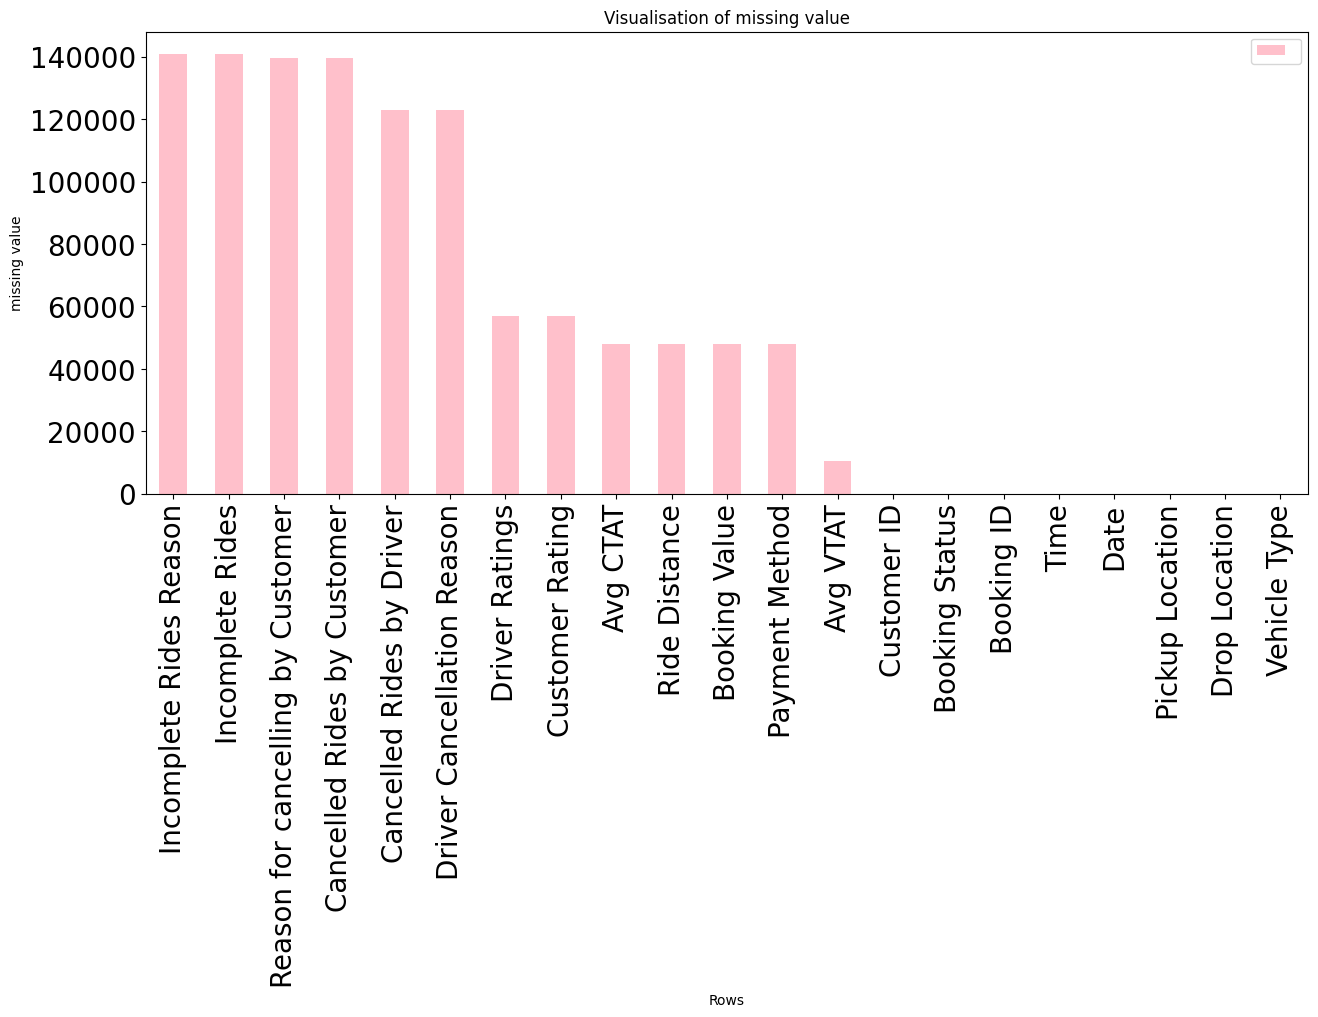

In [ ]:
plt.figure(figsize=(15,6))
missing_values.plot(kind = 'bar', color='pink',fontsize = 20,legend='True')
plt.title('Visualisation of missing value')
plt.ylabel('missing value')
plt.xlabel('Rows')
plt.show()


In [ ]:
df.dropna()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method


In [ ]:
df.fillna('unknown')

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,unknown,unknown,unknown,1.0,Vehicle Breakdown,237.0,5.73,unknown,unknown,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,unknown,unknown,unknown,unknown,unknown,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,unknown,unknown,unknown,unknown,unknown,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,unknown,unknown,unknown,unknown,unknown,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,unknown,unknown,unknown,unknown,unknown,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,unknown,unknown,unknown,unknown,unknown,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,unknown,unknown,unknown,unknown,unknown,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,unknown,unknown,unknown,unknown,unknown,333.0,45.54,4.1,3.7,UPI


In [ ]:
list(df.columns)

['Date',
 'Time',
 'Booking ID',
 'Booking Status',
 'Customer ID',
 'Vehicle Type',
 'Pickup Location',
 'Drop Location',
 'Avg VTAT',
 'Avg CTAT',
 'Cancelled Rides by Customer',
 'Reason for cancelling by Customer',
 'Cancelled Rides by Driver',
 'Driver Cancellation Reason',
 'Incomplete Rides',
 'Incomplete Rides Reason',
 'Booking Value',
 'Ride Distance',
 'Driver Ratings',
 'Customer Rating',
 'Payment Method']

<Axes: >

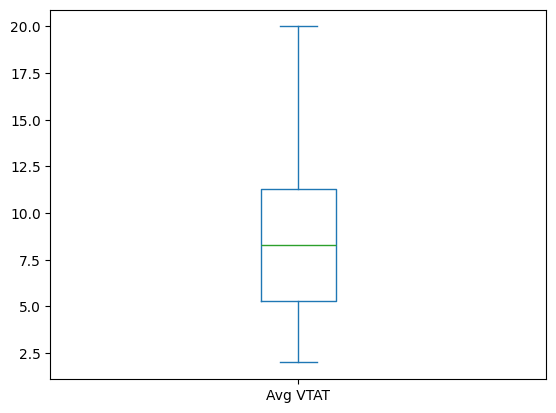

In [ ]:
df['Avg VTAT'].plot(kind='box')

In [ ]:
df['Avg VTAT']=df['Avg VTAT'].fillna(df['Avg VTAT'].mean())

<Axes: >

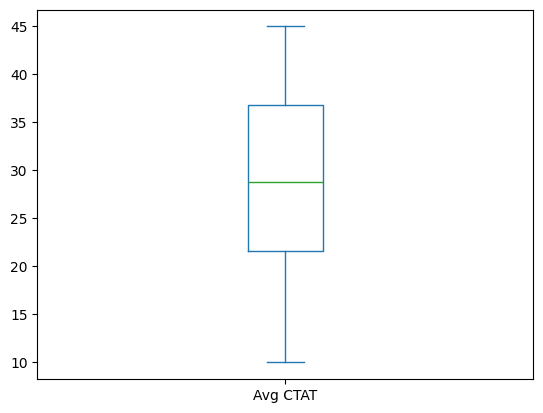

In [ ]:
df['Avg CTAT'].plot(kind='box')

In [ ]:
df['Avg CTAT']=df['Avg CTAT'].fillna(df['Avg CTAT'].mean())

In [ ]:
df['Payment Method']=df['Payment Method'].fillna(df['Payment Method'].mode()[0])

Cancelled Rides by Customer:

In [ ]:
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'].fillna(0)

<Axes: xlabel='Cancelled Rides by Customer'>

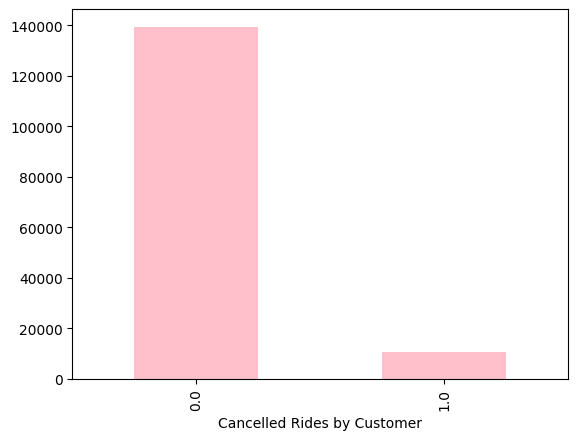

In [ ]:
df['Cancelled Rides by Customer'].value_counts().plot(kind='bar',color='pink')

Cancelled Rides by Driver:

In [ ]:
df['Cancelled Rides by Driver'].unique()

array([nan,  1.])

In [ ]:
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0)

<Axes: xlabel='Cancelled Rides by Driver'>

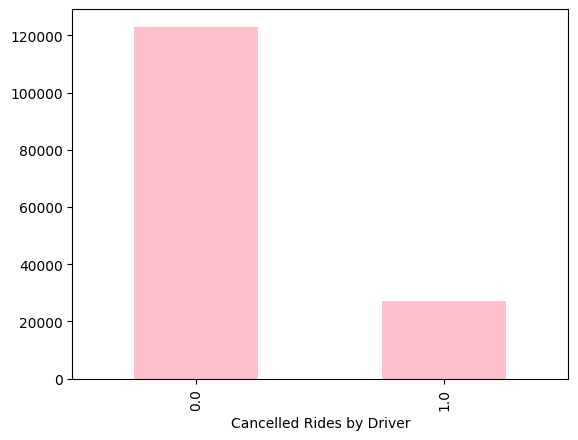

In [ ]:
df['Cancelled Rides by Driver'].value_counts().plot(kind='bar',color='pink')

In [ ]:
df.isna().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,0


Incomplete Rides:

In [ ]:
df['Incomplete Rides'].unique()

array([nan,  1.])

In [ ]:
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0)

<Axes: xlabel='Incomplete Rides'>

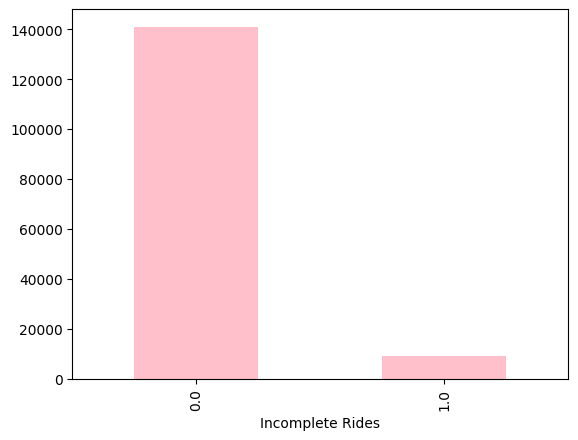

In [ ]:
df['Incomplete Rides'].value_counts().plot(kind='bar',color='pink')

Booking Value:

<Axes: >

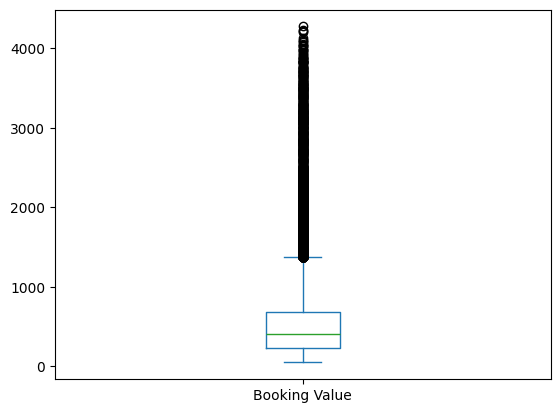

In [ ]:
df['Booking Value'].plot(kind='box')

In [ ]:
df['Booking Value']=df['Booking Value'].fillna(df['Booking Value'].median())

Ride Distance:

<Axes: >

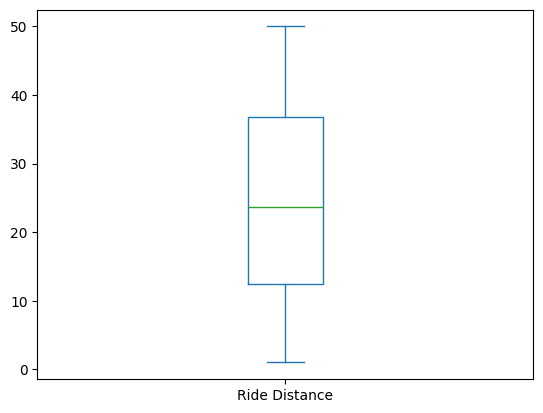

In [ ]:
df['Ride Distance'].plot(kind='box')

In [ ]:
df['Ride Distance']=df['Ride Distance'].fillna(df['Ride Distance'].mean())

Driver Ratings:

<Axes: >

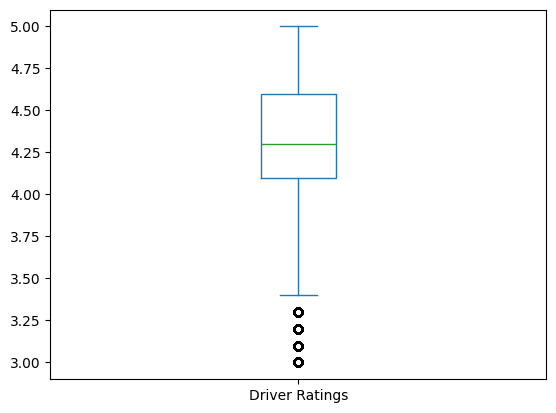

In [ ]:
df['Driver Ratings'].plot(kind='box')

In [ ]:
df['Driver Ratings']=df['Driver Ratings'].fillna(df['Driver Ratings'].median())

Customer Rating:

<Axes: >

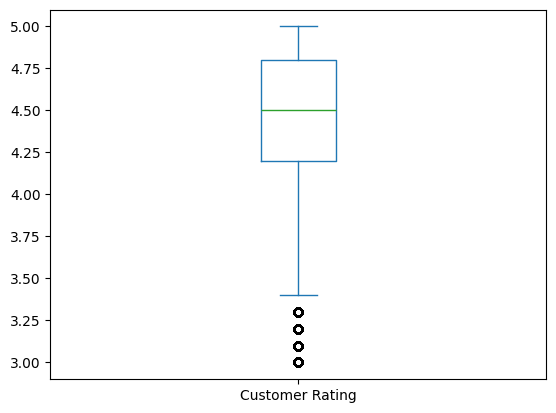

In [ ]:
df['Customer Rating'].plot(kind='box')

In [ ]:
df['Customer Rating']=df['Customer Rating'].fillna(df['Customer Rating'].median())

Reason for cancelling by Customer:

In [ ]:
df['Reason for cancelling by Customer']=df['Reason for cancelling by Customer'].fillna("Not Cancelled")

In [ ]:
df['Driver Cancellation Reason']=df['Driver Cancellation Reason'].fillna("Not Cancelled by Driver")

In [ ]:
df['Incomplete Rides Reason']=df['Incomplete Rides Reason'].fillna('Not Incomplete')

In [ ]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.456352,29.149636,...,Not Cancelled,0.0,Not Cancelled by Driver,0.0,Not Incomplete,414.0,24.637012,4.3,4.5,UPI
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,14.000000,...,Not Cancelled,0.0,Not Cancelled by Driver,1.0,Vehicle Breakdown,237.0,5.730000,4.3,4.5,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.400000,25.800000,...,Not Cancelled,0.0,Not Cancelled by Driver,0.0,Not Incomplete,627.0,13.580000,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.100000,28.500000,...,Not Cancelled,0.0,Not Cancelled by Driver,0.0,Not Incomplete,416.0,34.020000,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.300000,19.600000,...,Not Cancelled,0.0,Not Cancelled by Driver,0.0,Not Incomplete,737.0,48.210000,4.1,4.3,UPI


In [ ]:
df.isna().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,0


#Understanding Variables

In [ ]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [ ]:
df.describe(include='all')

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
count,150000,150000,150000,150000,150000,150000,150000,150000,150000.000000,150000.000000,...,150000,150000.000000,150000,150000.000000,150000,150000.000000,150000.000000,150000.000000,150000.000000,150000
unique,365,62910,148767,5,148788,7,176,176,NaN,NaN,...,6,NaN,5,NaN,4,NaN,NaN,NaN,NaN,5
top,2024-11-16,17:44:57,"""CNR6337479""",Completed,"""CID6715450""",Auto,Khandsa,Ashram,NaN,NaN,...,Not Cancelled,NaN,Not Cancelled by Driver,NaN,Not Incomplete,NaN,NaN,NaN,NaN,UPI
freq,462,16,3,93000,3,37419,949,936,NaN,NaN,...,139500,NaN,123000,NaN,141000,NaN,NaN,NaN,NaN,93909
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.456352,29.149636,...,NaN,0.180000,NaN,0.060000,NaN,478.121220,24.637012,4.257215,4.440842,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.639092,7.341242,...,NaN,0.384189,NaN,0.237488,NaN,329.339976,11.546441,0.345619,0.347835,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,10.000000,...,NaN,0.000000,NaN,0.000000,NaN,50.000000,1.000000,3.000000,3.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,25.000000,...,NaN,0.000000,NaN,0.000000,NaN,319.750000,17.360000,4.200000,4.300000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.456352,29.149636,...,NaN,0.000000,NaN,0.000000,NaN,414.000000,24.637012,4.300000,4.500000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,32.900000,...,NaN,0.000000,NaN,0.000000,NaN,521.000000,30.650000,4.300000,4.600000,NaN


#Check Unique Values for each variable

In [ ]:
# Check Unique Values for each variable.
# We describe all the unique values using lambda fuction of individual column.
a=df.apply(lambda col: col.unique())
print(a)

Date                                 [2024-03-23, 2024-11-29, 2024-08-23, 2024-10-2...
Time                                 [12:29:38, 18:01:39, 08:56:10, 17:17:25, 22:08...
Booking ID                           ["CNR5884300", "CNR1326809", "CNR8494506", "CN...
Booking Status                       [No Driver Found, Incomplete, Completed, Cance...
Customer ID                          ["CID1982111", "CID4604802", "CID9202816", "CI...
Vehicle Type                         [eBike, Go Sedan, Auto, Premier Sedan, Bike, G...
Pickup Location                      [Palam Vihar, Shastri Nagar, Khandsa, Central ...
Drop Location                        [Jhilmil, Gurgaon Sector 56, Malviya Nagar, In...
Avg VTAT                             [8.456351971326164, 4.9, 13.4, 13.1, 5.3, 5.1,...
Avg CTAT                             [29.149636274509803, 14.0, 25.8, 28.5, 19.6, 1...
Cancelled Rides by Customer                                                 [0.0, 1.0]
Reason for cancelling by Customer    [Not C

2.Convert date/time columns to appropriate formats.

In [ ]:
#Convert Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
##print(df['Date'].dt.day_name())   # gives day name like Monday, Tuesday

In [ ]:
#Convert Time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

#pd.to_datetime(df['Time'], errors='coerce') → changes the text into datetime format.
#format='%H:%M:%S' → tells Pandas your time has hours:minutes:seconds.
#.dt.time → keeps only the time part (without today’s date).

In [ ]:
#print(df['Time'].head())

3.Standardize categorical variables

In [ ]:
df['Booking Status'] = df['Booking Status'].str.strip().str.title()
df['Vehicle Type'] = df['Vehicle Type'].str.strip().str.title()

In [ ]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",Ebike,Palam Vihar,Jhilmil,8.456352,29.149636,...,Not Cancelled,0.0,Not Cancelled by Driver,0.0,Not Incomplete,414.0,24.637012,4.3,4.5,UPI
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,14.000000,...,Not Cancelled,0.0,Not Cancelled by Driver,1.0,Vehicle Breakdown,237.0,5.730000,4.3,4.5,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.400000,25.800000,...,Not Cancelled,0.0,Not Cancelled by Driver,0.0,Not Incomplete,627.0,13.580000,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.100000,28.500000,...,Not Cancelled,0.0,Not Cancelled by Driver,0.0,Not Incomplete,416.0,34.020000,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.300000,19.600000,...,Not Cancelled,0.0,Not Cancelled by Driver,0.0,Not Incomplete,737.0,48.210000,4.1,4.3,UPI


# 2.Descriptive Analysis

1.What are the most and least popular vehicle types?

In [ ]:
a=df['Vehicle Type'].value_counts()
a

,count
Vehicle Type,
Auto,37419
Go Mini,29806
Go Sedan,27141
Bike,22517
Premier Sedan,18111
Ebike,10557
Uber Xl,4449


<Axes: xlabel='Vehicle Type'>

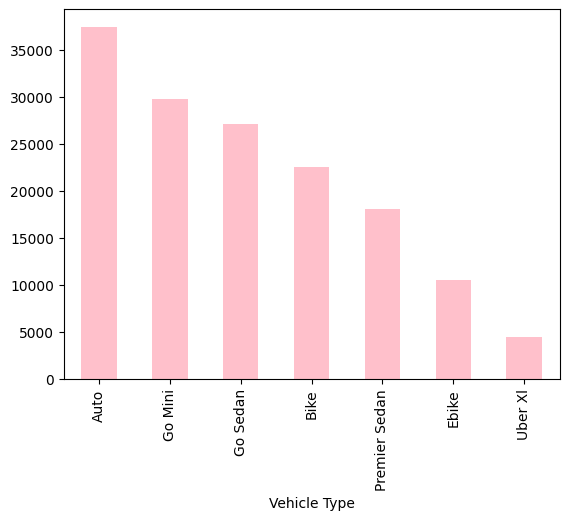

In [ ]:
a.plot(kind='bar',color='pink',)

2.What is the average ride distance and booking value?

In [ ]:
b=df[['Ride Distance', 'Booking Value']].mean()
b

,0
Ride Distance,24.637012
Booking Value,478.121220


<Axes: >

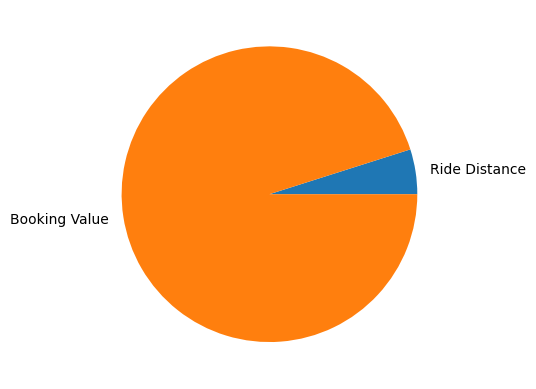

In [ ]:
b.plot(kind='pie')

3.Distribution of ratings (drivers and customers).

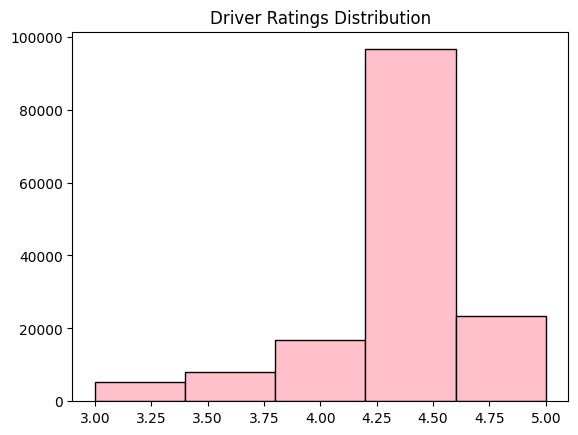

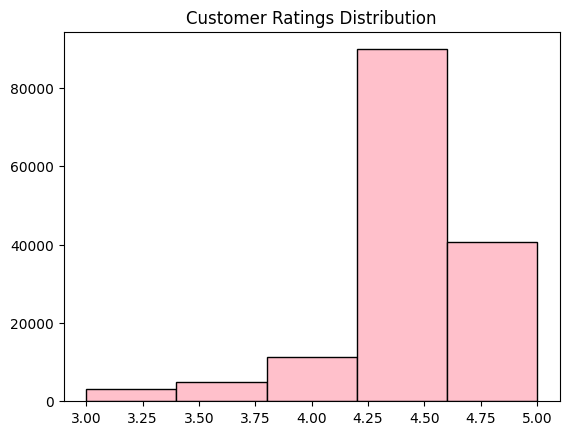

In [ ]:
plt.hist(df['Driver Ratings'], bins=5, color='pink',edgecolor='black')
plt.title("Driver Ratings Distribution")
plt.show()
print()
plt.hist(df['Customer Rating'], bins=5,color='pink', edgecolor='black')
plt.title("Customer Ratings Distribution")
plt.show()

4.Most common cancellation reasons by customers and drivers.

Most Common Customer Cancellation Reasons:
 Reason for cancelling by Customer
Not Cancelled                                   139500
Wrong Address                                     2362
Change of plans                                   2353
Driver is not moving towards pickup location      2335
Driver asked to cancel                            2295
AC is not working                                 1155
Name: count, dtype: int64

Most Common Driver Cancellation Reasons:
 Driver Cancellation Reason
Not Cancelled by Driver                123000
Customer related issue                   6837
The customer was coughing/sick           6751
Personal & Car related issues            6726
More than permitted people in there      6686
Name: count, dtype: int64


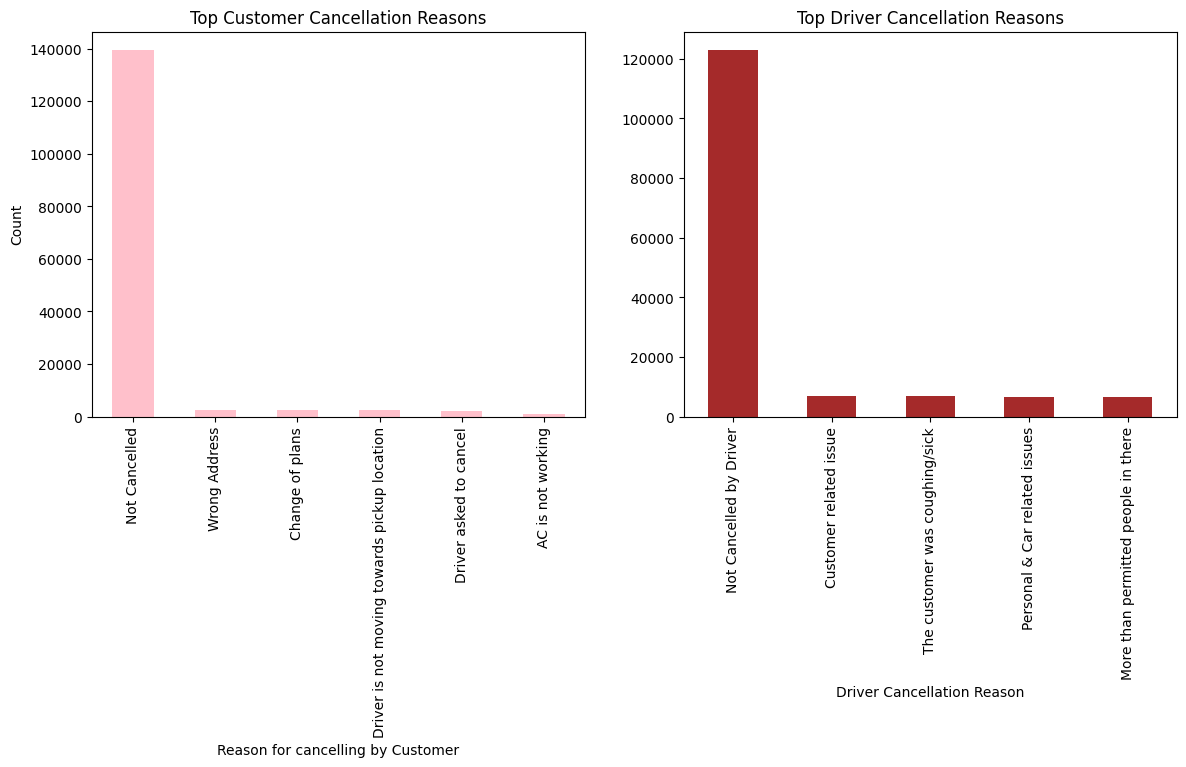

In [ ]:
# customer cancellation reasons
top_customer_reasons = df['Reason for cancelling by Customer'].value_counts()
print("Most Common Customer Cancellation Reasons:\n", top_customer_reasons)

# driver cancellation reasons
top_driver_reasons = df['Driver Cancellation Reason'].value_counts()
print("\nMost Common Driver Cancellation Reasons:\n", top_driver_reasons)

# Bar charts

fig, axes = plt.subplots(1, 2, figsize=(14,5))

top_customer_reasons.plot(kind='bar', ax=axes[0], color='pink')
axes[0].set_title("Top Customer Cancellation Reasons")
axes[0].set_ylabel("Count")

top_driver_reasons.plot(kind='bar', ax=axes[1], color='brown')
axes[1].set_title("Top Driver Cancellation Reasons")

plt.show()

# 3.	Customer Behavior Insights

1.Who are the frequent cancellers (by customer ID)?

Customer ID
"CID2358909"    2
"CID5251785"    2
"CID5505307"    2
"CID8519067"    2
"CID7939117"    2
"CID8887672"    2
"CID8416905"    2
"CID5488244"    2
"CID5962105"    1
"CID3453695"    1
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Frequent Cancellers (Customer IDs)'}, xlabel='Customer ID'>

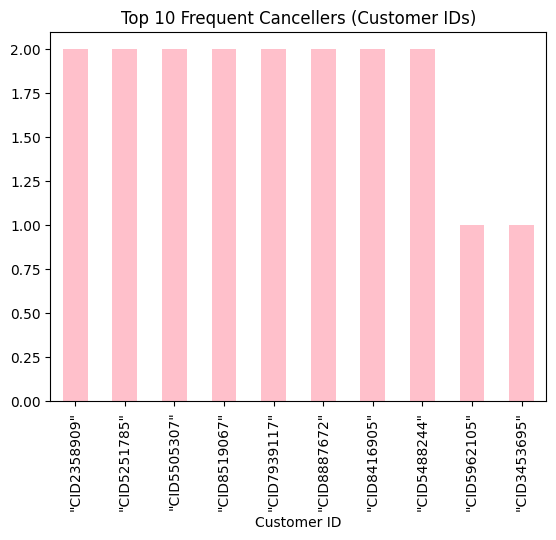

In [ ]:
# Filter only customer cancellations
customer_cancellations = df[df['Booking Status'] == "Cancelled By Customer"]

# Count cancellations per customer
frequent_cancellers = customer_cancellations['Customer ID'].value_counts().head(10)
print(frequent_cancellers)
# Plot
frequent_cancellers.plot(kind='bar',color='pink', title="Top 10 Frequent Cancellers (Customer IDs)")

2.Is there a pattern in cancellations by time of day or day of week?

In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()
# Extract hour
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# Define time-of-day bins
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(time_of_day)
# Combine into one column
df['Day_Time'] = df['DayOfWeek'] + " - " + df['TimeOfDay']
# Frequency of booking status by day & time
booking_pattern = df.groupby('Day_Time')['Booking Status'].value_counts(normalize=True).unstack()
booking_pattern


Booking Status,Cancelled By Customer,Cancelled By Driver,Completed,Incomplete,No Driver Found
Day_Time,,,,,
Friday - Night,0.073188,0.176520,0.619386,0.058840,0.072066
Monday - Night,0.069811,0.186703,0.615321,0.060294,0.067871
Saturday - Night,0.067496,0.179835,0.623990,0.059744,0.068935
Sunday - Night,0.070474,0.179222,0.622208,0.058650,0.069446
Thursday - Night,0.069715,0.176856,0.622484,0.061042,0.069903
Tuesday - Night,0.068674,0.183208,0.615726,0.062269,0.070123
Wednesday - Night,0.070658,0.177556,0.620931,0.059170,0.071685


3.Correlation between ride value, distance, and customer satisfaction.

In [ ]:
cor=df[['Booking Value','Ride Distance','Driver Ratings','Customer Rating']].corr()
cor

,Booking Value,Ride Distance,Driver Ratings,Customer Rating
Booking Value,1.000000,0.005128,-0.011532,-0.015791
Ride Distance,0.005128,1.000000,-0.016377,-0.015866
Driver Ratings,-0.011532,-0.016377,1.000000,0.011907
Customer Rating,-0.015791,-0.015866,0.011907,1.000000


<Axes: >

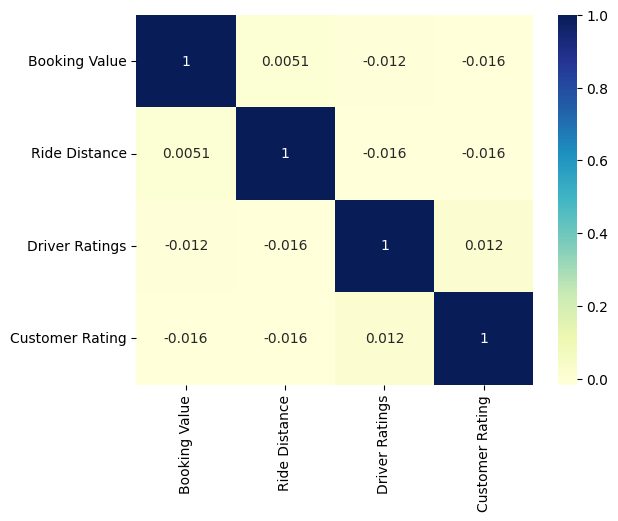

In [ ]:
sns.heatmap(cor,annot=True,cmap='YlGnBu')

# 4.Driver Performance Evaluation

1.Which drivers have the highest/lowest ratings?

In [ ]:
a=df.groupby('Customer ID')['Driver Ratings'].mean().sort_values(ascending=False).head(10)
b=df.groupby('Customer ID')['Driver Ratings'].mean().sort_values().head(10)
print(a)
print(b)

Customer ID
"CID3479882"    5.0
"CID7362579"    5.0
"CID8957721"    5.0
"CID2694789"    5.0
"CID9292395"    5.0
"CID6179401"    5.0
"CID1428767"    5.0
"CID9823828"    5.0
"CID3493547"    5.0
"CID3492914"    5.0
Name: Driver Ratings, dtype: float64
Customer ID
"CID8611009"    3.0
"CID1188560"    3.0
"CID4778746"    3.0
"CID3182413"    3.0
"CID4755957"    3.0
"CID8599965"    3.0
"CID8598402"    3.0
"CID8587797"    3.0
"CID1590244"    3.0
"CID4745406"    3.0
Name: Driver Ratings, dtype: float64


2.How many rides are being cancelled by drivers and why?

Driver Cancellation Reason
Customer related issue                 6837
More than permitted people in there    6686
Personal & Car related issues          6726
The customer was coughing/sick         6751
dtype: int64


<Axes: >

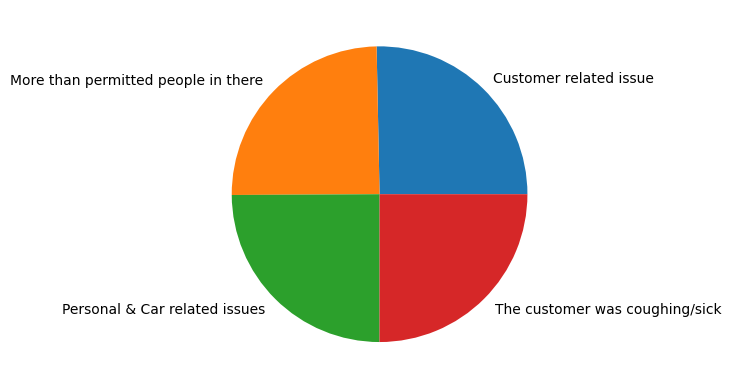

In [ ]:
a=df[df['Booking Status']=="Cancelled By Driver"].groupby('Driver Cancellation Reason').size()
print(a)
a.plot(kind='pie')

# 5.Operational Metrics

1.Average VTAT and CTAT across vehicle types and locations.

In [ ]:
# Average VTAT and CTAT by Vehicle Type
avg_by_vehicle = df.groupby("Vehicle Type")[["Avg VTAT", "Avg CTAT"]].mean().reset_index()


# Average VTAT and CTAT by Pickup Location
avg_by_location = df.groupby("Pickup Location")[["Avg VTAT", "Avg CTAT"]].mean().reset_index()

# Display as tables in Jupyter
from IPython.display import display

print(" Average VTAT & CTAT by Vehicle Type")
display(avg_by_vehicle)

print("\n Average VTAT & CTAT by Pickup Location (Top 10)")
display(avg_by_location.head(10))

 Average VTAT & CTAT by Vehicle Type


,Vehicle Type,Avg VTAT,Avg CTAT
0,Auto,8.448876,29.144655
1,Bike,8.497126,29.183517
2,Ebike,8.476863,29.168388
3,Go Mini,8.467307,29.156196
4,Go Sedan,8.405551,29.075787
5,Premier Sedan,8.439994,29.196626
6,Uber Xl,8.567307,29.190849



 Average VTAT & CTAT by Pickup Location (Top 10)


,Pickup Location,Avg VTAT,Avg CTAT
0,AIIMS,8.292538,29.289370
1,Adarsh Nagar,8.419340,28.698547
2,Akshardham,8.468563,28.885624
3,Ambience Mall,8.596248,29.295192
4,Anand Vihar,8.577518,29.542145
5,Anand Vihar ISBT,8.386777,28.993987
6,Ardee City,8.321108,29.532004
7,Arjangarh,8.548821,29.082652
8,Ashok Park Main,8.568191,29.314878
9,Ashok Vihar,8.554444,29.239080


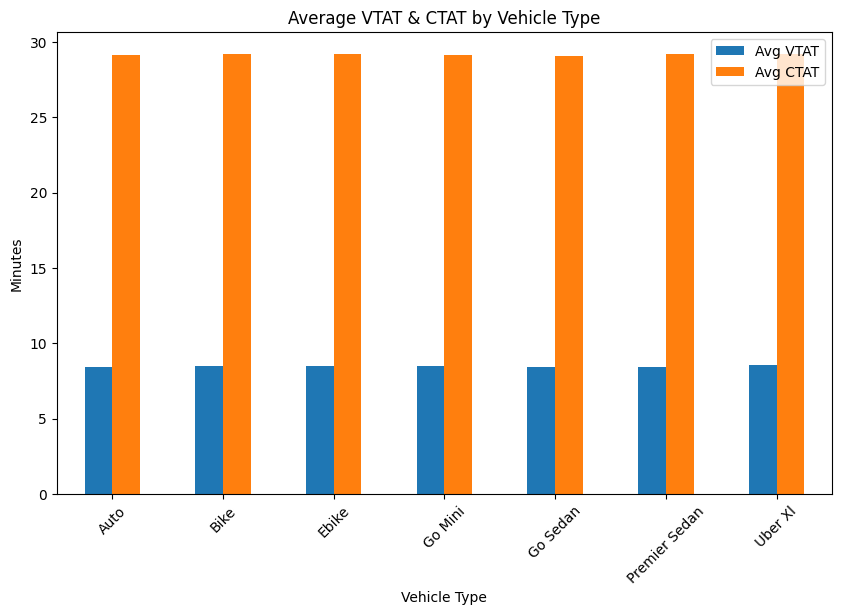

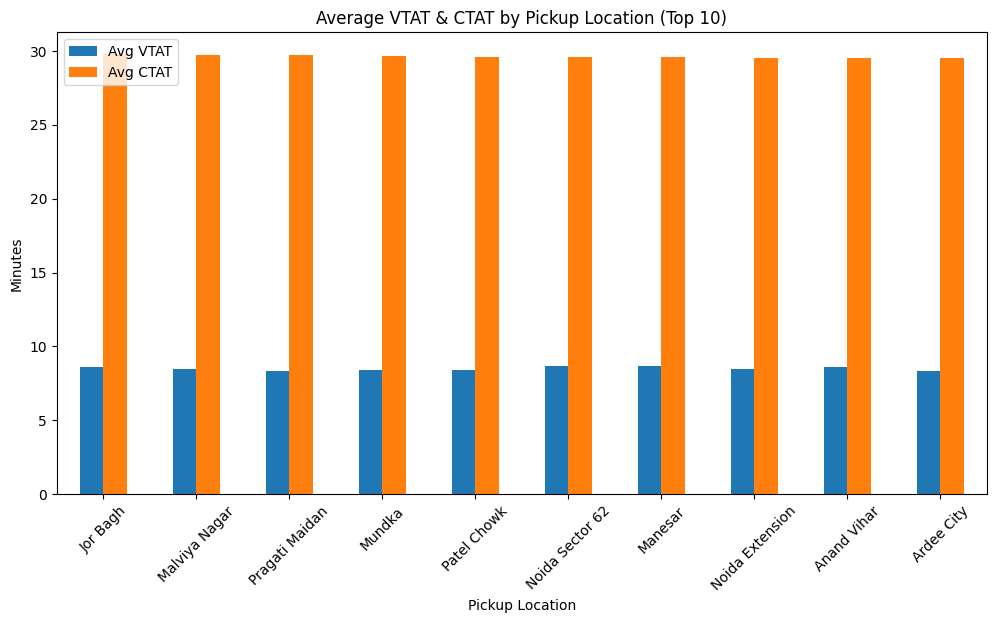

In [ ]:
# --- Vehicle Type ---
avg_by_vehicle.plot(x="Vehicle Type", kind="bar", figsize=(10,6))
plt.title("Average VTAT & CTAT by Vehicle Type")
plt.ylabel("Minutes")
plt.xticks(rotation=45)
plt.show()

# --- Pickup Location (Top 10) ---
top10_locations = avg_by_location.nlargest(10, "Avg CTAT")  # choose by CTAT or VTAT
top10_locations.plot(x="Pickup Location", kind="bar", figsize=(12,6))
plt.title("Average VTAT & CTAT by Pickup Location (Top 10)")
plt.ylabel("Minutes")
plt.xticks(rotation=45)
plt.show()

2.Identify peak demand locations and time slots.

In [ ]:
#Peak Demand Locations
# Count bookings per pickup location
peak_locations = df['Pickup Location'].value_counts().head(10)

print("Top 10 Peak Demand Pickup Locations")
display(peak_locations)

Top 10 Peak Demand Pickup Locations


,count
Pickup Location,
Khandsa,949
Barakhamba Road,946
Saket,931
Badarpur,921
Pragati Maidan,920
Madipur,919
AIIMS,918
Mehrauli,915
Dwarka Sector 21,914


Bookings by Hour


,count
Hour,
0,1373
1,1360
2,1339
3,1383
4,1321
5,2786
6,4160
7,5450
8,6861


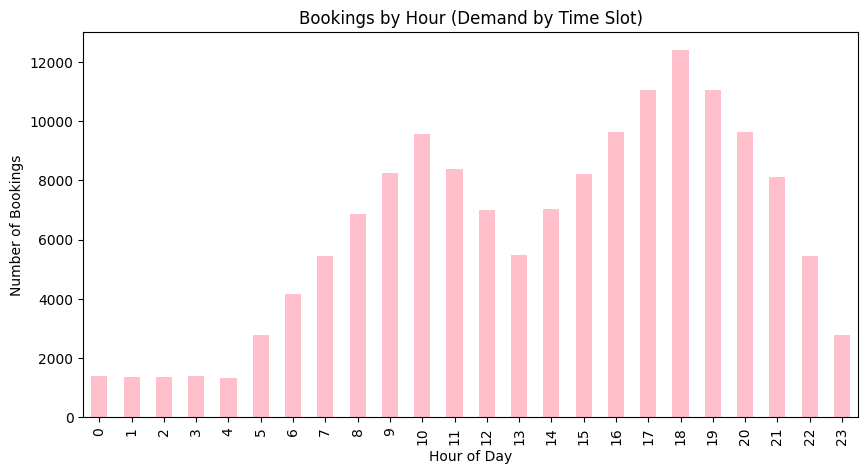

In [ ]:
# Convert Time column to datetime (keep as datetime)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Extract hour
df['Hour'] = df['Time'].dt.hour

# Count bookings per hour
peak_hours = df['Hour'].value_counts().sort_index()

print("Bookings by Hour")
display(peak_hours)

# Plot bookings by hour
plt.figure(figsize=(10,5))
peak_hours.plot(kind='bar',color='pink')
plt.title("Bookings by Hour (Demand by Time Slot)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Bookings")
plt.show()

In [ ]:
# Group by both Pickup Location and Hour
location_time = df.groupby(['Pickup Location','Hour']).size().reset_index(name='Booking Count')

# Sort to find top combinations
top_location_time = location_time.sort_values(by='Booking Count', ascending=False).head(10)

print("Top 10 Location & Time Slot Combinations")
display(top_location_time)

Top 10 Location & Time Slot Combinations


,Pickup Location,Hour,Booking Count
3833,Sushant Lok,18,91
3761,Subhash Chowk,18,86
1698,Kadarpur,18,86
1603,Janakpuri,19,85
42,Adarsh Nagar,18,85
1912,Khan Market,17,85
3065,Punjabi Bagh,18,84
4146,Vinobapuri,19,84
3977,Udyog Vihar,18,84
3329,Rohini West,18,83


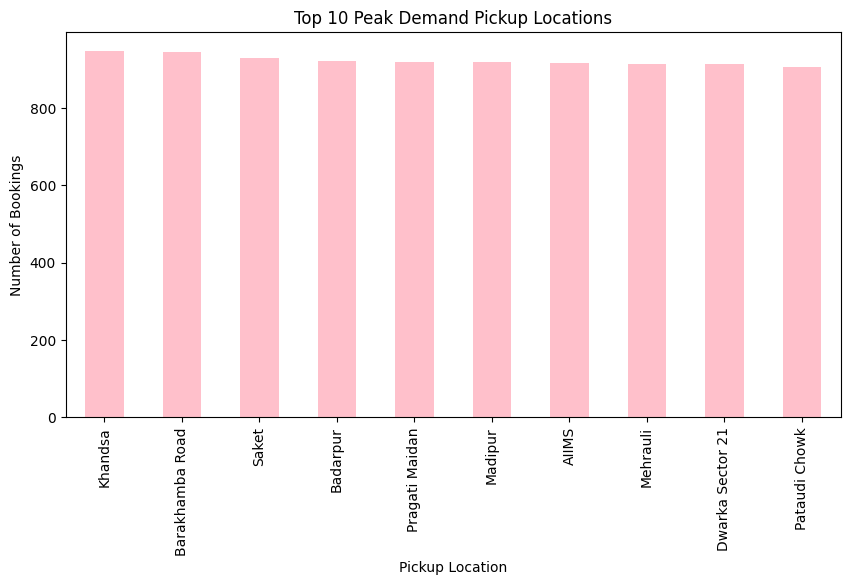

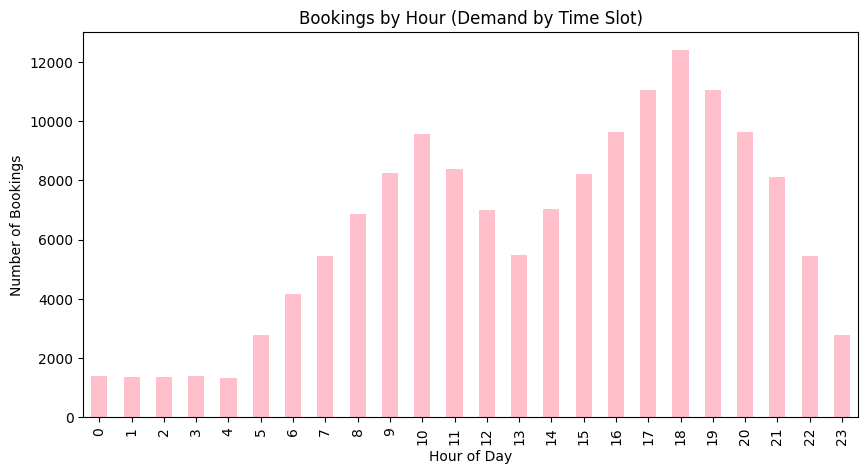

In [ ]:
# Plot top 10 locations
peak_locations.plot(kind='bar', color='pink',figsize=(10,5), title="Top 10 Peak Demand Pickup Locations")
plt.ylabel("Number of Bookings")
plt.show()

# Plot bookings by hour
peak_hours.plot(kind='bar',color='pink', figsize=(10,5), title="Bookings by Hour (Demand by Time Slot)")
plt.ylabel("Number of Bookings")
plt.xlabel("Hour of Day")
plt.show()


3.Analyze booking statuses over time.

In [ ]:
# Count bookings per day per status
status_trend = df.groupby([df['Date'].dt.date, 'Booking Status']).size().unstack(fill_value=0)
print("Booking Status Trend (first 10 days)")
display(status_trend.head(10))

Booking Status Trend (first 10 days)


Booking Status,Cancelled By Customer,Cancelled By Driver,Completed,Incomplete,No Driver Found
Date,,,,,
2024-01-01,25,94,251,21,23
2024-01-02,31,68,240,18,32
2024-01-03,20,75,245,24,20
2024-01-04,31,73,254,27,29
2024-01-05,28,72,257,25,34
2024-01-06,27,89,234,28,31
2024-01-07,25,83,271,30,28
2024-01-08,26,66,250,27,18
2024-01-09,34,80,257,31,32


<Figure size 1200x600 with 0 Axes>

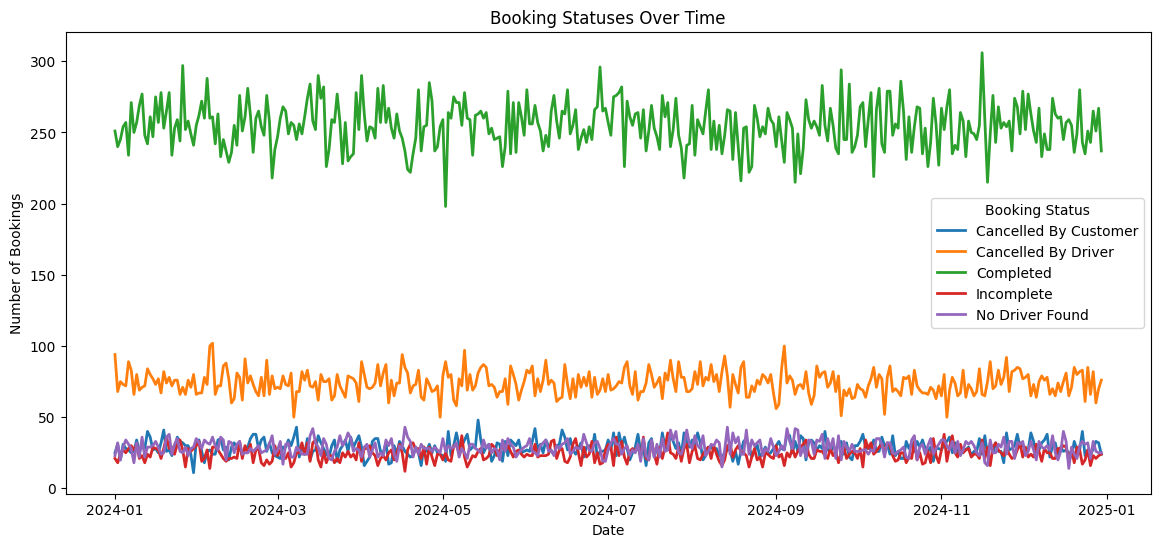

In [ ]:
#Plot Trend Over Time
plt.figure(figsize=(12,6))
status_trend.plot(kind='line', figsize=(14,6), linewidth=2)

plt.title("Booking Statuses Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.legend(title="Booking Status")
plt.show()
